In [23]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import pickle
from sklearn.model_selection import train_test_split

In [24]:
path = r"C:\Users\minhd\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 3 - Flu Classification\Flu Classification.csv"
df = pd.read_csv(path)
df.head(10)

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,NaN,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,NaN,60.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,38.166667,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
8,H1N1,NaN,46.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.611111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
9,H1N1,NaN,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = df.iloc[0:1484,[0,2,3,25,31,32,33,34,35,36,41,46,49]]
df.head(10)

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,H1N1,67.0,F,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No,NaN
1,H1N1,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,20.0,F,immuno,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes,NaN
4,H1N1,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,60.0,M,"Renal Disease, athero",NaN,No,Yes,NaN,No,NaN,38.166667,No,NaN
8,H1N1,46.0,F,NaN,NaN,Yes,Yes,NaN,No,NaN,38.611111,No,NaN
9,H1N1,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df["Age"].fillna(0, inplace = True)
df["Temperature"].fillna(0, inplace = True)
df["Sex"].fillna("unknown", inplace = True)
df["RiskFactors"].fillna("unknown", inplace = True)
df["Diarrhea"].fillna("unknown", inplace = True)
df["Fever"].fillna("unknown", inplace = True)
df["ShortnessOfBreath"].fillna("unknown", inplace = True)
df["SoreThroat"].fillna("unknown", inplace = True)
df["NauseaVomitting"].fillna("unknown", inplace = True)
df["Fatigue"].fillna("unknown", inplace = True)
df["Cancer"].fillna("unknown", inplace = True)
df["Coughing"].fillna("unknown", inplace = True)
df.head(10)

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,H1N1,67.0,F,unknown,unknown,Yes,Yes,unknown,No,unknown,38.111111,No,unknown
1,H1N1,29.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
2,H1N1,22.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
3,H1N1,20.0,F,immuno,unknown,Yes,Yes,unknown,No,unknown,36.555556,Yes,unknown
4,H1N1,21.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
5,H1N1,22.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
6,H1N1,19.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
7,H1N1,60.0,M,"Renal Disease, athero",unknown,No,Yes,unknown,No,unknown,38.166667,No,unknown
8,H1N1,46.0,F,unknown,unknown,Yes,Yes,unknown,No,unknown,38.611111,No,unknown
9,H1N1,18.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown


In [27]:
df.Diagnosis = df.Diagnosis.astype("category").cat.codes
df.Sex = df.Sex.astype("category").cat.codes
df.RiskFactors = df.RiskFactors.astype("category").cat.codes
df.Diarrhea = df.Diarrhea.astype("category").cat.codes
df.Fever = df.Fever.astype("category").cat.codes
df.Coughing = df.Coughing.astype("category").cat.codes
df.ShortnessOfBreath = df.ShortnessOfBreath.astype("category").cat.codes
df.SoreThroat = df.SoreThroat.astype("category").cat.codes
df.NauseaVomitting = df.NauseaVomitting.astype("category").cat.codes
df.Fatigue = df.Fatigue.astype("category").cat.codes
df.Cancer = df.Cancer.astype("category").cat.codes
df.head()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,1,67.0,0,63,2,1,1,2,0,2,38.111111,0,1
1,1,29.0,1,63,2,2,2,2,2,2,0.000000,2,1
2,1,22.0,0,63,2,2,2,2,2,2,0.000000,2,1
3,1,20.0,0,53,2,1,1,2,0,2,36.555556,1,1
4,1,21.0,1,63,2,2,2,2,2,2,0.000000,2,1


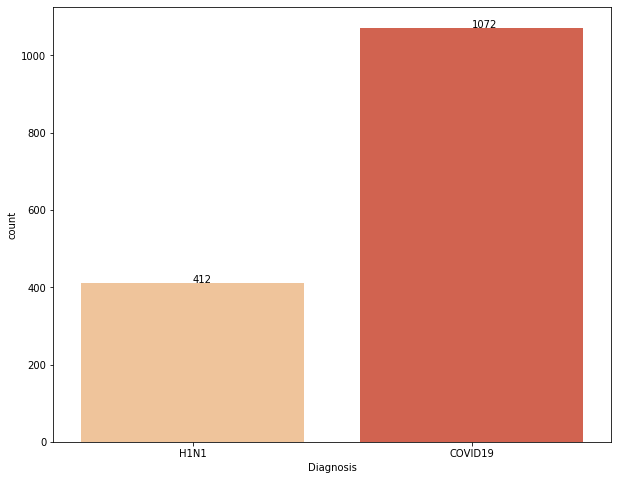

In [28]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Diagnosis'], palette='OrRd')
ax.set_xticklabels(['H1N1','COVID19'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

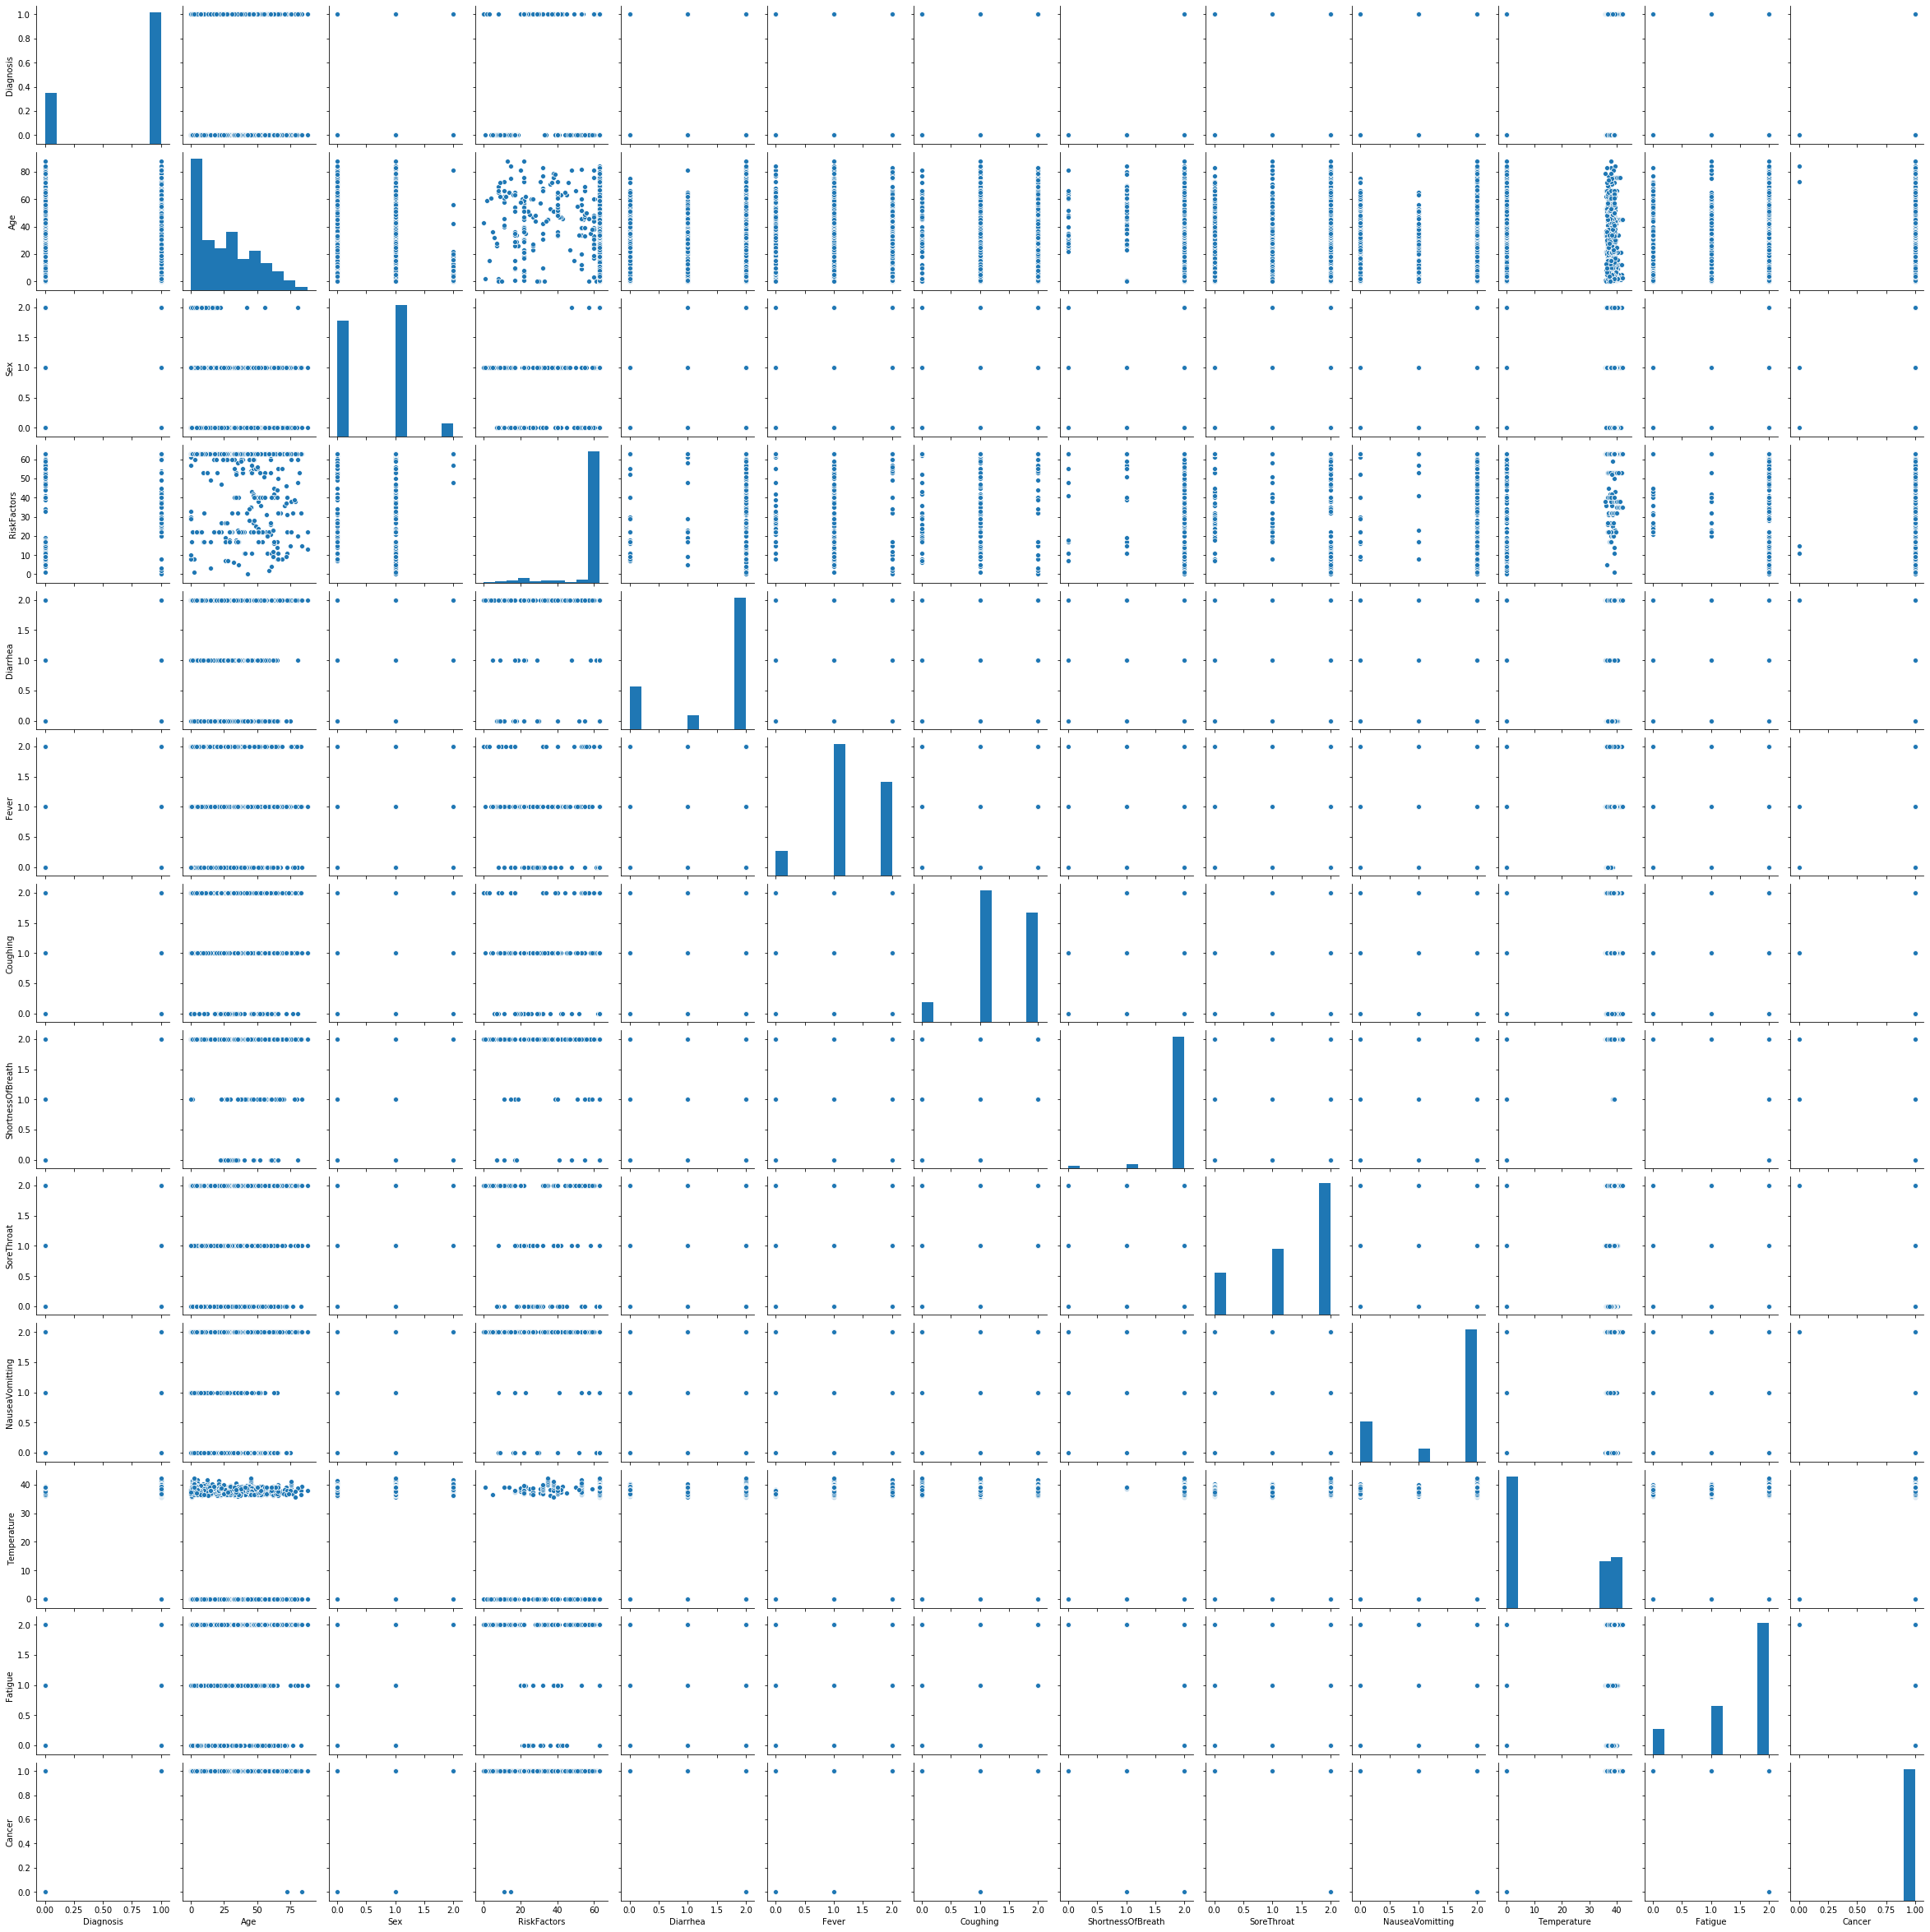

In [29]:
sns.pairplot(df)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from timeit import default_timer as timer

In [31]:
x = df.iloc[:,1:]
x.head()

,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,67.0,0,63,2,1,1,2,0,2,38.111111,0,1
1,29.0,1,63,2,2,2,2,2,2,0.000000,2,1
2,22.0,0,63,2,2,2,2,2,2,0.000000,2,1
3,20.0,0,53,2,1,1,2,0,2,36.555556,1,1
4,21.0,1,63,2,2,2,2,2,2,0.000000,2,1


In [32]:
y = df.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int8

In [33]:
path = r"C:\Users\minhd\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 3 - Flu Classification\Flu_Classification_Training_Dataset.csv"
dfTrain = pd.read_csv(path)
dfTrain.head(10)

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,5.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
1,13.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,0.0,0.000000,F,unknown,No,Yes,Yes,unknown,Yes,No,unknown,unknown,H1N1
3,26.0,39.000000,F,unknown,unknown,Yes,No,unknown,Yes,unknown,No,unknown,H1N1
4,44.0,0.000000,M,unknown,unknown,No,Yes,unknown,Yes,unknown,No,unknown,H1N1
5,10.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
6,57.0,38.500000,M,athero,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
7,4.0,37.000000,M,asthma,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
8,29.0,37.611111,M,unknown,No,No,Yes,unknown,Yes,No,Yes,unknown,H1N1
9,6.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [34]:
dfTrain.Diagnosis = dfTrain.Diagnosis.astype("category").cat.codes
dfTrain.Sex = dfTrain.Sex.astype("category").cat.codes
dfTrain.RiskFactors = dfTrain.RiskFactors.astype("category").cat.codes
dfTrain.Diarrhea = dfTrain.Diarrhea.astype("category").cat.codes
dfTrain.Fever = dfTrain.Fever.astype("category").cat.codes
dfTrain.Coughing = dfTrain.Coughing.astype("category").cat.codes
dfTrain.ShortnessOfBreath = dfTrain.ShortnessOfBreath.astype("category").cat.codes
dfTrain.SoreThroat = dfTrain.SoreThroat.astype("category").cat.codes
dfTrain.NauseaVomitting = dfTrain.NauseaVomitting.astype("category").cat.codes
dfTrain.Fatigue = dfTrain.Fatigue.astype("category").cat.codes
dfTrain.Cancer = dfTrain.Cancer.astype("category").cat.codes

In [35]:
x_train = dfTrain.iloc[:,:-1]
x_train

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,5.00,0.000000,1,49,2,2,2,2,2,2,2,1
1,13.00,0.000000,1,49,2,2,2,2,2,2,2,1
2,0.00,0.000000,0,49,0,1,1,2,1,0,2,1
3,26.00,39.000000,0,49,2,1,0,2,1,2,0,1
4,44.00,0.000000,1,49,2,0,1,2,1,2,0,1
5,10.00,0.000000,1,49,2,2,2,2,2,2,2,1
6,57.00,38.500000,1,23,2,1,1,2,0,2,0,1
7,4.00,37.000000,1,16,2,1,1,2,0,2,0,1
8,29.00,37.611111,1,49,0,0,1,2,1,0,1,1
9,6.00,0.000000,0,49,2,2,2,2,2,2,2,1


In [36]:
y_train = dfTrain.iloc[:,-1]
y_train

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      0
12      1
13      1
14      0
15      1
16      1
17      1
18      0
19      1
20      1
21      0
22      1
23      0
24      1
25      1
26      1
27      0
28      1
29      0
       ..
1083    0
1084    0
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    1
1095    1
1096    1
1097    1
1098    1
1099    1
1100    0
1101    1
1102    1
1103    1
1104    1
1105    1
1106    0
1107    1
1108    1
1109    1
1110    1
1111    1
1112    1
Name: Diagnosis, Length: 1113, dtype: int8

In [37]:
path = r"C:\Users\minhd\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 3 - Flu Classification\Flu_Classification_Testing_Dataset.csv"
dfTest = pd.read_csv(path)
dfTest.head(10)

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,22.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
1,21.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,19.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,55.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
4,60.0,36.777778,F,"asthma, congestive, diabetes",unknown,No,No,unknown,No,unknown,No,unknown,H1N1
5,65.0,38.111111,F,unknown,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
6,35.0,0.000000,F,unknown,unknown,No,No,unknown,No,unknown,No,unknown,H1N1
7,19.0,0.000000,F,unknown,unknown,No,No,unknown,No,unknown,No,unknown,H1N1
8,49.0,38.444444,F,"asthma, chronic, diabetes",unknown,Yes,Yes,unknown,Yes,unknown,No,unknown,H1N1
9,77.0,36.944444,F,chronic,unknown,No,No,unknown,No,unknown,No,unknown,H1N1


In [38]:
dfTest.Diagnosis = dfTest.Diagnosis.astype("category").cat.codes
dfTest.Sex = dfTest.Sex.astype("category").cat.codes
dfTest.RiskFactors = dfTest.RiskFactors.astype("category").cat.codes
dfTest.Diarrhea = dfTest.Diarrhea.astype("category").cat.codes
dfTest.Fever = dfTest.Fever.astype("category").cat.codes
dfTest.Coughing = dfTest.Coughing.astype("category").cat.codes
dfTest.ShortnessOfBreath = dfTest.ShortnessOfBreath.astype("category").cat.codes
dfTest.SoreThroat = dfTest.SoreThroat.astype("category").cat.codes
dfTest.NauseaVomitting = dfTest.NauseaVomitting.astype("category").cat.codes
dfTest.Fatigue = dfTest.Fatigue.astype("category").cat.codes
dfTest.Cancer = dfTest.Cancer.astype("category").cat.codes

In [39]:
x_test = dfTest.iloc[:,:-1]
x_test

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,22.000,0.000000,0,34,2,2,2,2,2,2,2,0
1,21.000,0.000000,1,34,2,2,2,2,2,2,2,0
2,19.000,0.000000,0,34,2,2,2,2,2,2,2,0
3,55.000,0.000000,0,34,2,2,2,2,2,2,2,0
4,60.000,36.777778,0,14,2,0,0,2,0,2,0,0
5,65.000,38.111111,0,34,2,1,1,2,0,2,0,0
6,35.000,0.000000,0,34,2,0,0,2,0,2,0,0
7,19.000,0.000000,0,34,2,0,0,2,0,2,0,0
8,49.000,38.444444,0,13,2,1,1,2,1,2,0,0
9,77.000,36.944444,0,18,2,0,0,2,0,2,0,0


In [40]:
y_test = dfTest.iloc[:,-1]
y_test

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    0
352    0
353    0
354    0
355    0
356    0
357    0
358    0
359    0
360    0
361    0
362    0
363    0
364    0
365    0
366    0
367    0
368    0
369    0
370    0
371    0
Name: Diagnosis, Length: 372, dtype: int8

In [41]:
dfTrain['Diagnosis'].value_counts()

1    812
0    301
Name: Diagnosis, dtype: int64

In [42]:
dfTest['Diagnosis'].value_counts()

1    260
0    112
Name: Diagnosis, dtype: int64

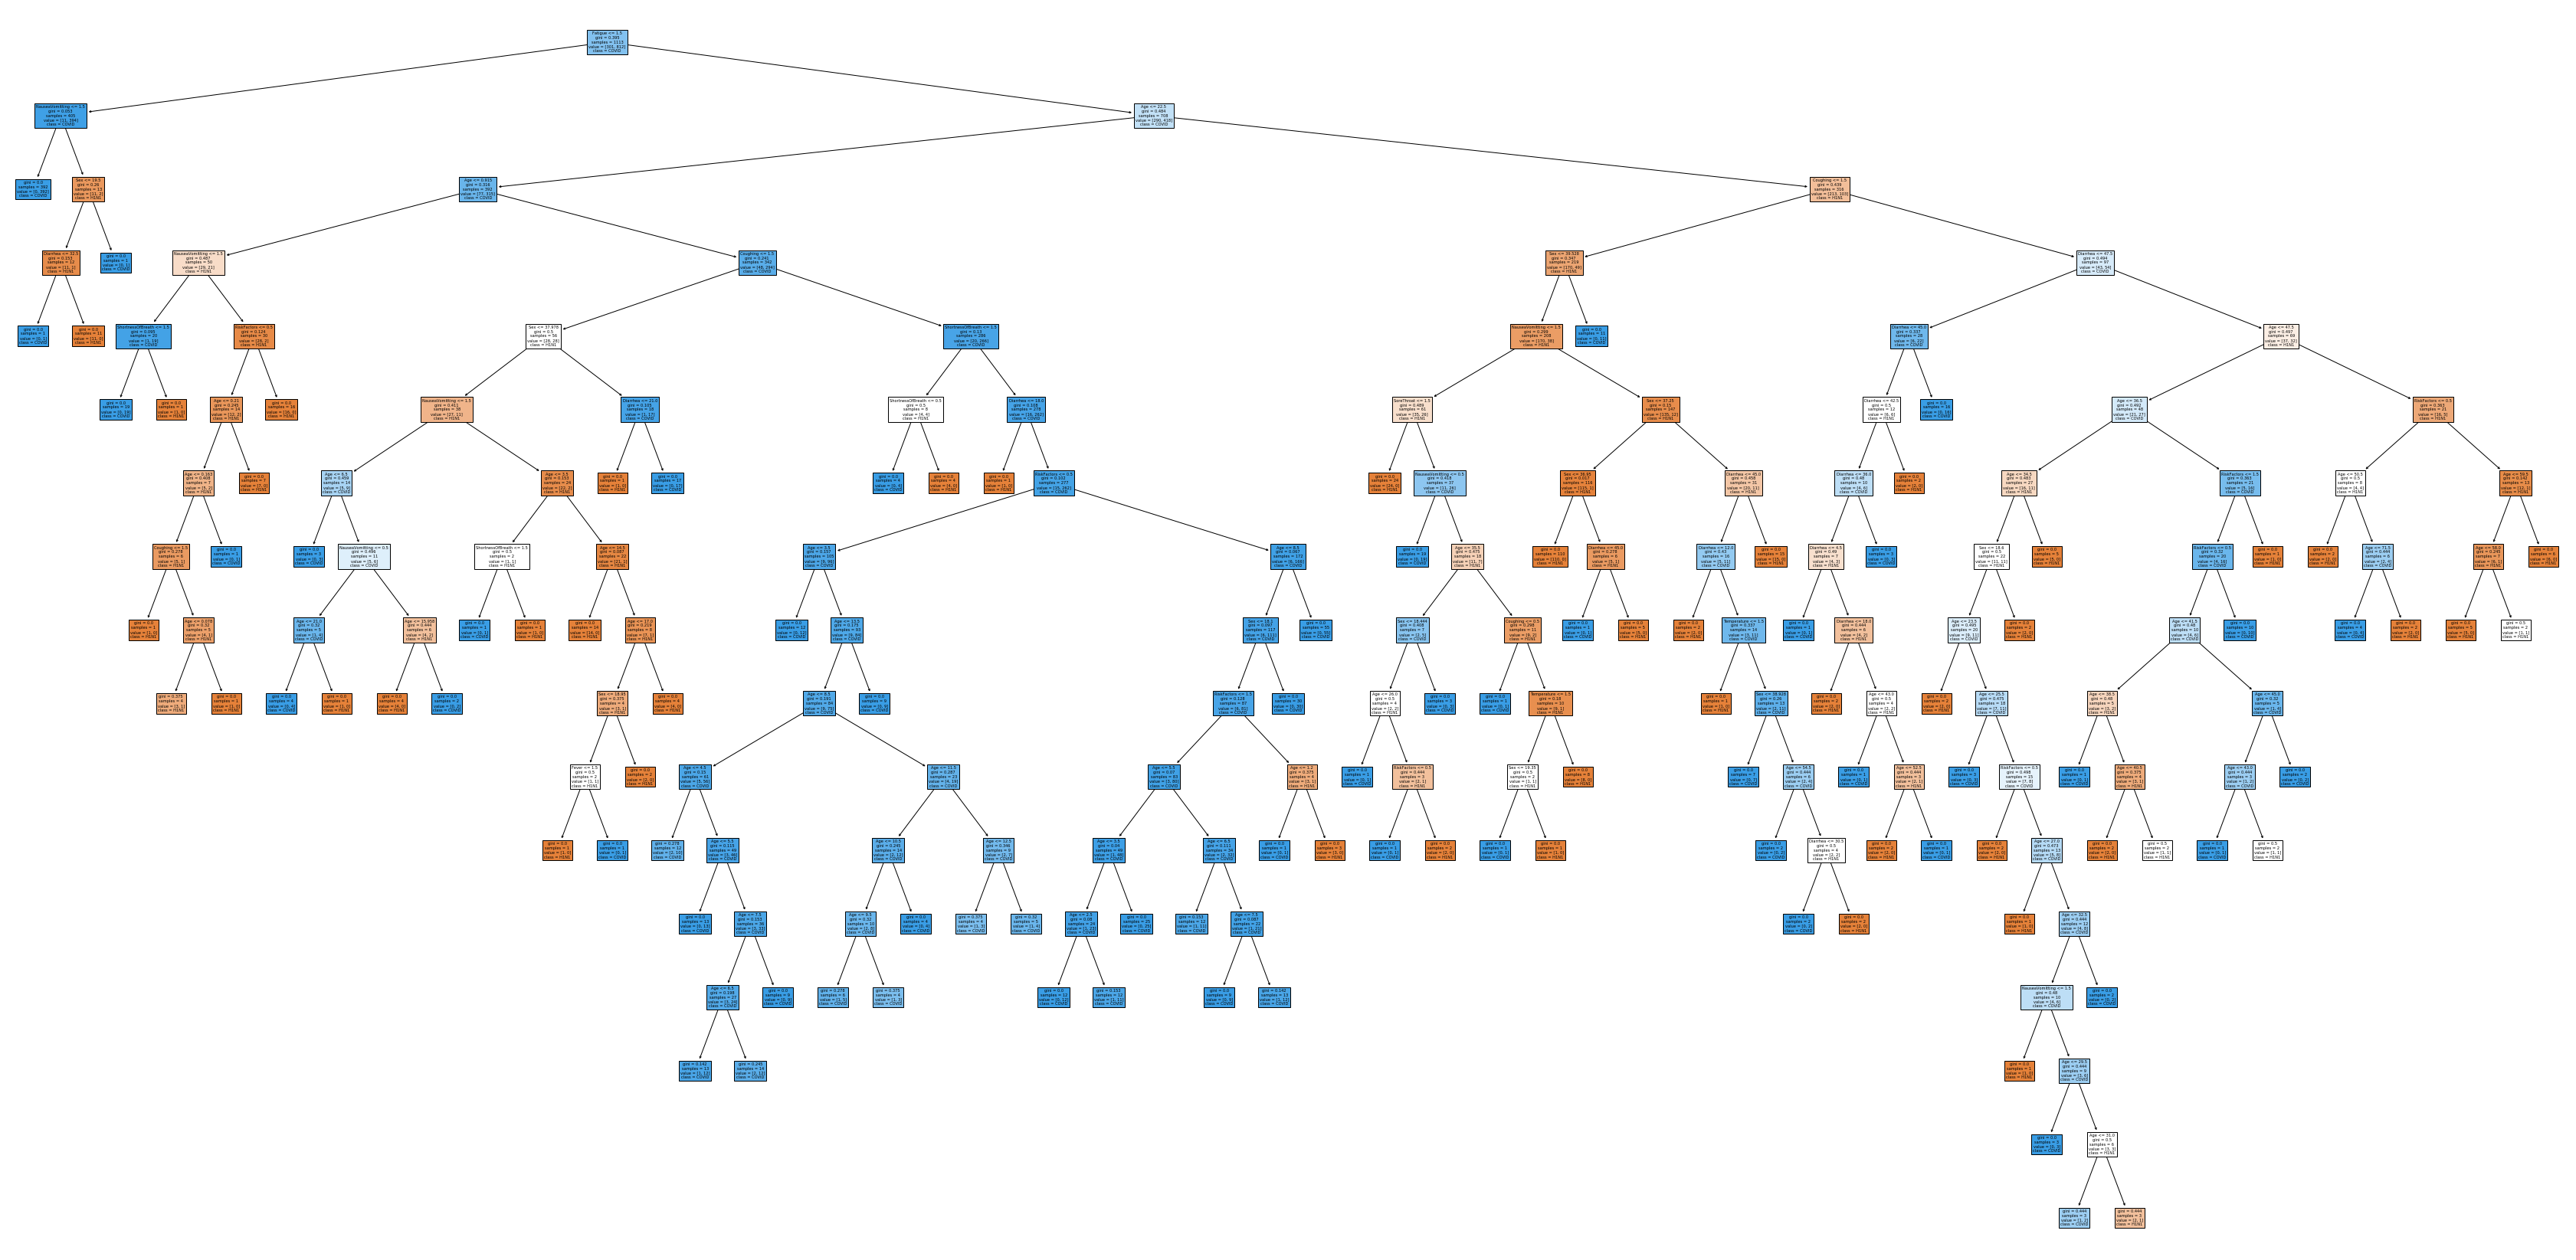

In [43]:
#time for generate the decision tree
a = timer()
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(x_train, y_train)
b = timer()

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [44]:
#time for prediction
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("time for generate decision tree: " + str(delta) + " seconds")
print("time for prediction: " + str(delta1) + " seconds")

time for generate decision tree: 0.007269000000178494 seconds
time for prediction: 0.0023744000000078813 seconds


In [45]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.8790322580645161


In [46]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  78
TP  249
FN  11
FP  34
[[ 78  34]
 [ 11 249]]


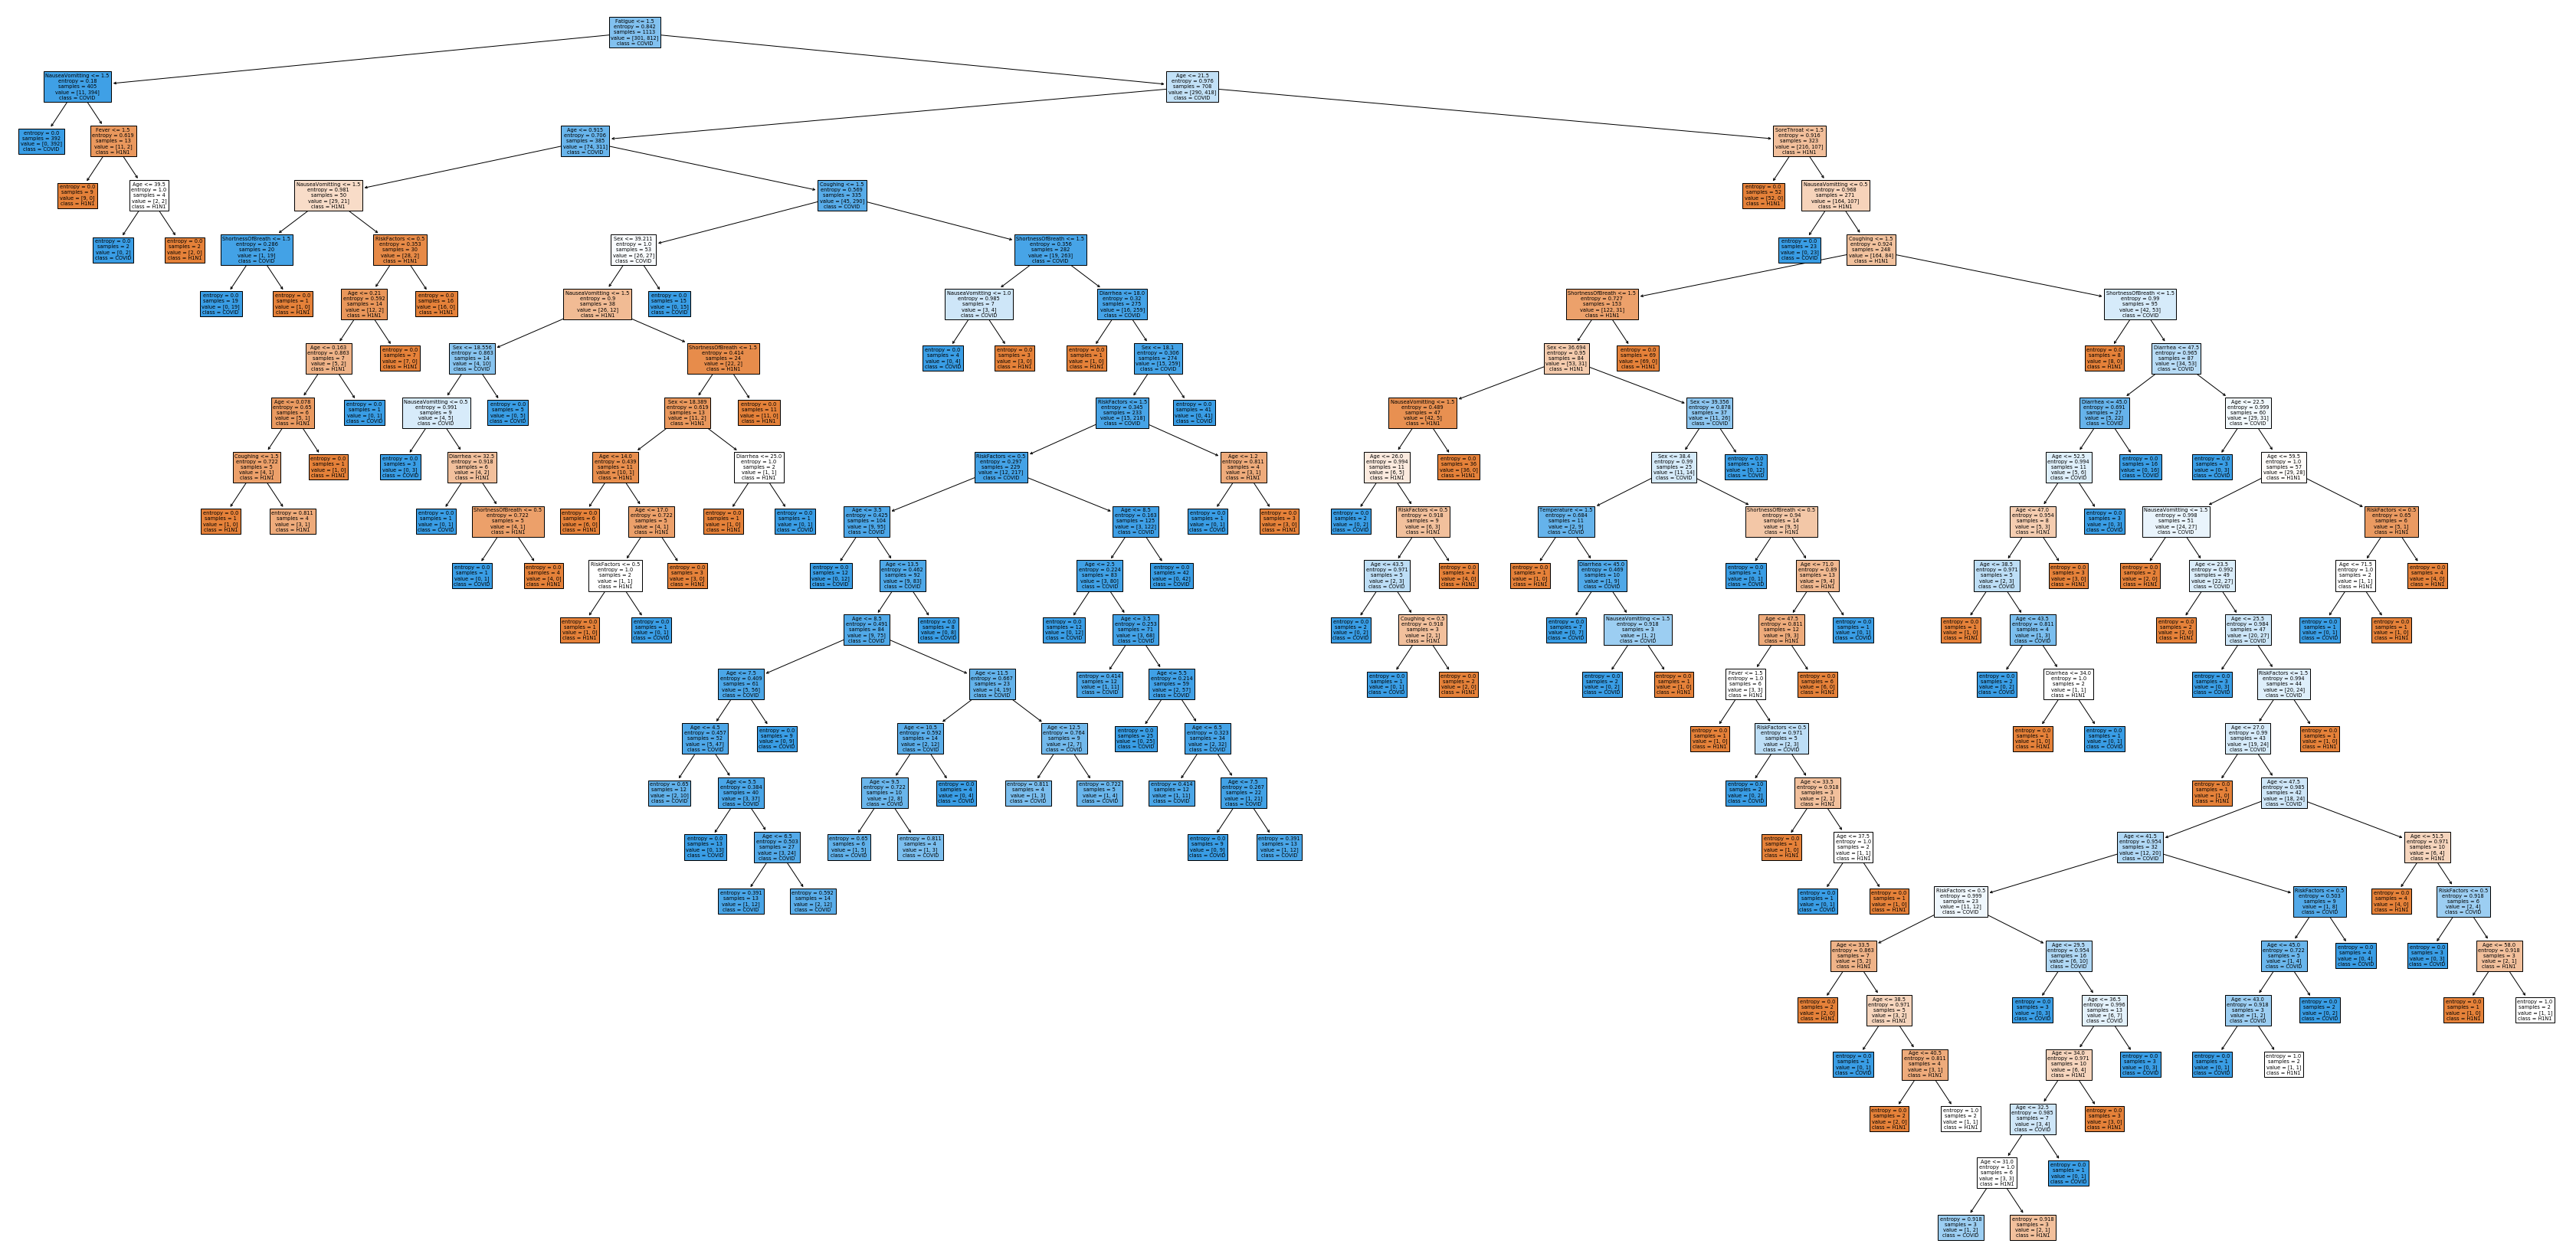

In [47]:
#time for generate the decision tree
a = timer()
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train, y_train)
b = timer()



plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [48]:
#time for prediction
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("time for generate decision tree: " + str(delta) + " seconds")
print("time for prediction: " + str(delta1) + " seconds")

time for generate decision tree: 0.012490300000081334 seconds
time for prediction: 0.007985499999904278 seconds


In [49]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.9059139784946236


In [50]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  95
TP  242
FN  18
FP  17
[[ 95  17]
 [ 18 242]]


In [51]:
dt.tree_.node_count

213